## Loading and using a trained model for Dsprites
Notebook demonstrating how to load a JointVAE model and use it for various things.

In [13]:
from utils.load_model import load

path_to_model_folder = './trained_models/celeba/'

model = load(path_to_model_folder)

In [14]:
# Print the latent distribution info
print(model.latent_spec)

{'disc': [10], 'cont': 32}


In [15]:
# Print model architecture
print(model)

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=32, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=32, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=42, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose

In [4]:
from viz.visualize import Visualizer as Viz

# Create a Visualizer for the model
viz = Viz(model)
viz.save_images = False  # Return tensors instead of saving images

torch.Size([3, 530, 530])


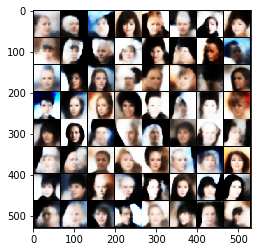

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

samples = viz.samples()
samples = samples.permute(1,2,0)
plt.imshow(samples.numpy())

torch.Size([2180, 530, 3])


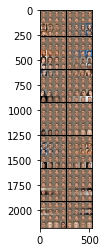

In [35]:
traversals = viz.all_latent_traversals()
traversals = traversals.permute(1,2,0)
print(traversals.shape)
plt.imshow(traversals.numpy())

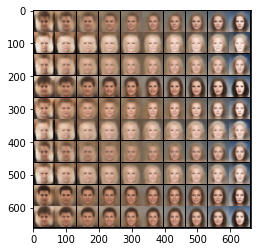

In [33]:
# Traverse 3rd continuous latent dimension across columns and first 
# discrete latent dimension across rows
traversals = viz.latent_traversal_grid(cont_idx=2, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
traversals = traversals.permute(1,2,0)
plt.imshow(traversals.numpy(), cmap='gray')

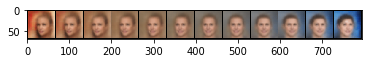

In [34]:
traversal = viz.latent_traversal_line(cont_idx=6, size=12)
traversal = traversal.permute(1,2,0)
plt.imshow(traversal.numpy())

In [10]:
from utils.dataloaders import get_mnist_dataloaders

# Get MNIST test data
_, dataloader = get_mnist_dataloaders(batch_size=32)

# Extract a batch of data
for batch, labels in dataloader:
    break
    
recon = viz.reconstructions(batch, size=(8, 8))

plt.imshow(recon.numpy()[0, :, :], cmap='gray')

C:\Users\v-tayan\joint-vae\viz\visualize.py:41: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_data = Variable(data, volatile=True)


RuntimeError: Given groups=1, weight of size [32, 3, 4, 4], expected input[32, 1, 32, 32] to have 3 channels, but got 1 channels instead

In [11]:
from torch.autograd import Variable
encodings = model.encode(Variable(batch))

RuntimeError: Given groups=1, weight of size [32, 3, 4, 4], expected input[32, 1, 32, 32] to have 3 channels, but got 1 channels instead

In [12]:
# Continuous encodings for the first 5 examples
encodings['cont'][0][:5]

NameError: name 'encodings' is not defined